In [1]:
import numpy as np
import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
files = list(glob.glob('/ssd2/giorgian/HFML-NewFiles-1/trigger/1/*.npz'))

In [3]:
momentums = []
n_hits = []

In [4]:
for file in tqdm(files[:10000]):
    f = np.load(file)
    momentums.extend(f['momentums'])
    n_hits.extend(f['n_hits'])

  0%|          | 0/10000 [00:00<?, ?it/s]

In [5]:
momentums = np.stack(momentums, axis=0)
n_hits = np.stack(n_hits, axis=0)

In [6]:
total_hits = np.sum(n_hits, axis=-1)
total_momentum = np.linalg.norm(momentums, axis=-1)

Text(0.5, 0, 'Momentum')

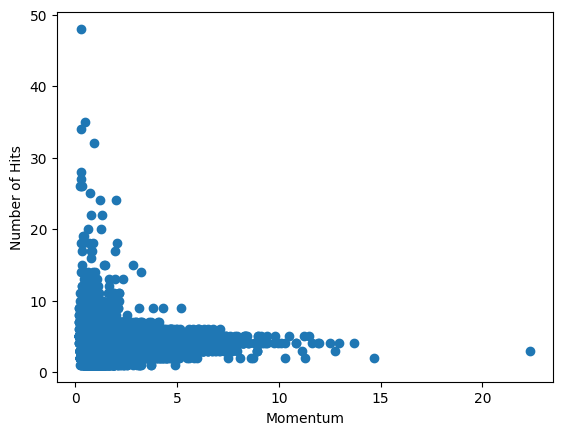

In [7]:
plt.scatter(total_momentum, total_hits)
plt.ylabel('Number of Hits')
plt.xlabel('Momentum')

Text(0, 0.5, 'N Hits')

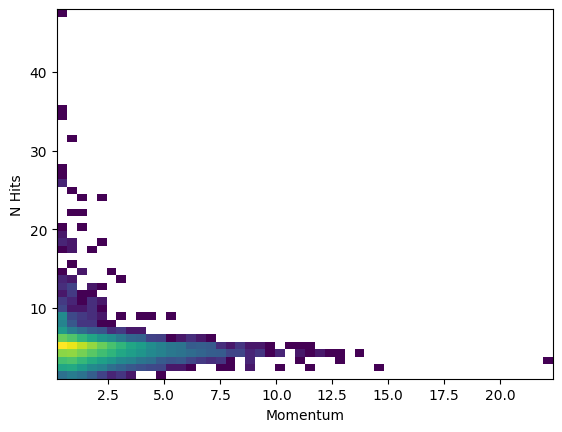

In [8]:
plt.hist2d(total_momentum, total_hits, bins=50, norm=colors.LogNorm())
plt.xlabel('Momentum')
plt.ylabel('N Hits')

In [9]:
p_t = np.linalg.norm(momentums[..., :2], axis=-1)
p_z = momentums[..., -1]

Text(0.5, 0, '$p_t$')

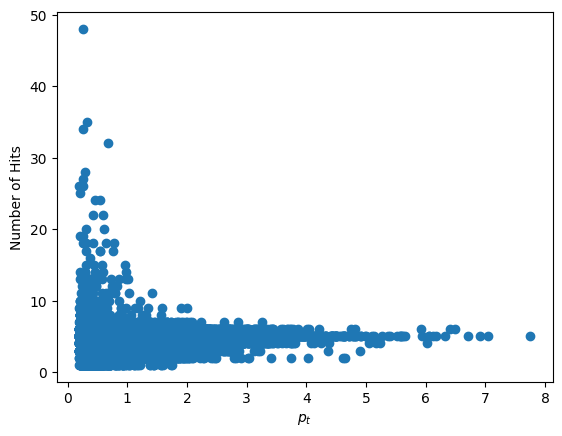

In [10]:
plt.scatter(p_t, total_hits)
plt.ylabel('Number of Hits')
plt.xlabel('$p_t$')

Text(0.5, 0, '$p_z$')

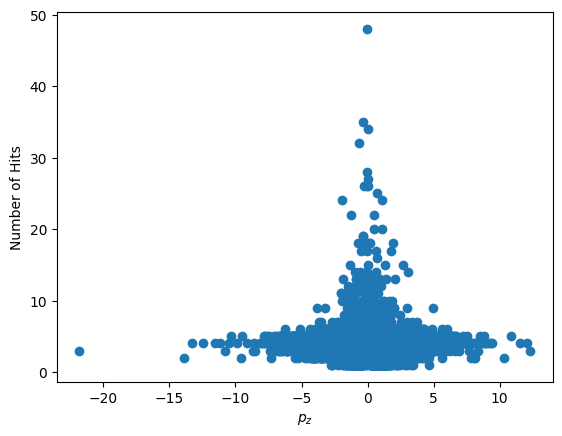

In [13]:
plt.scatter(p_z, total_hits)
plt.ylabel('Number of Hits')
plt.xlabel('$p_z$')

Text(0.5, 0, '$p_z$')

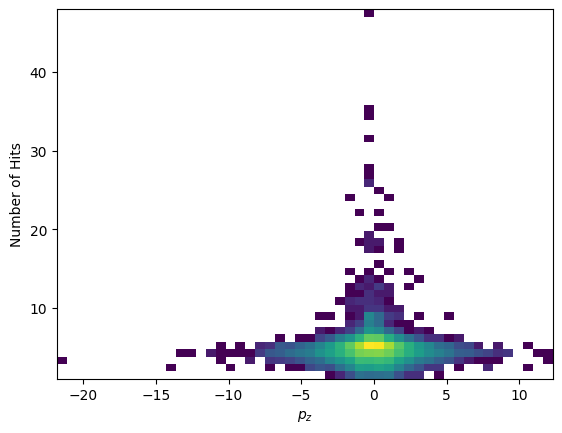

In [15]:
plt.hist2d(p_z, total_hits, norm=colors.LogNorm(), bins=50)
plt.ylabel('Number of Hits')
plt.xlabel('$p_z$')

Text(0.5, 0, '$p_t$')

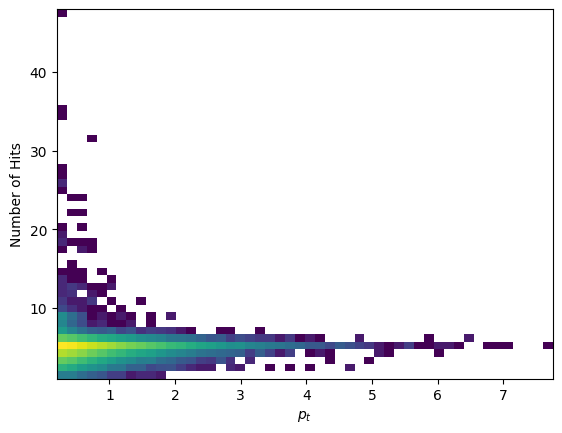

In [17]:
plt.hist2d(p_t, total_hits, norm=colors.LogNorm(), bins=50)
plt.ylabel('Number of Hits')
plt.xlabel('$p_t$')

Text(0.5, 0, 'Number of Hits')

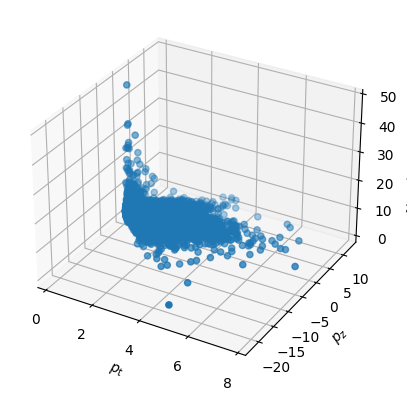

In [16]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(p_t, p_z, total_hits)
ax.set_xlabel('$p_t$')
ax.set_ylabel('$p_z$')
ax.set_zlabel('Number of Hits')

In [20]:
trigger_momentums = []
nontrigger_momentums = []
for file in tqdm(files[:10000]):
    f = np.load(file)
    trigger = f['trigger_track_flags']
    momentums = f['momentums']
    trigger_momentums.append(momentums[trigger])
    nontrigger_momentums.append(momentums[~trigger])
trigger_momentums = np.concatenate(trigger_momentums, axis=0)
nontrigger_momentums = np.concatenate(nontrigger_momentums, axis=0)

  0%|          | 0/10000 [00:00<?, ?it/s]

(array([9.52968077e-01, 6.43360693e-01, 3.07705781e-01, 1.53410657e-01,
        8.10613246e-02, 4.63018041e-02, 2.63349803e-02, 1.55444930e-02,
        1.04588125e-02, 6.14703989e-03, 3.98009777e-03, 2.65339852e-03,
        2.18905378e-03, 1.23825264e-03, 1.08347106e-03, 8.18131209e-04,
        5.97014666e-04, 2.87451506e-04, 2.65339852e-04, 1.99004889e-04,
        1.32669926e-04, 0.00000000e+00, 6.63349629e-05, 2.21116543e-05,
        6.63349629e-05, 6.63349629e-05, 4.42233086e-05, 2.21116543e-05,
        4.42233086e-05, 0.00000000e+00, 2.21116543e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.21116543e-05]),
 array([ 0.20013567,  0.64317942,  1.08622316,  1.52926691,  1.97231066,
         2.41535441, 

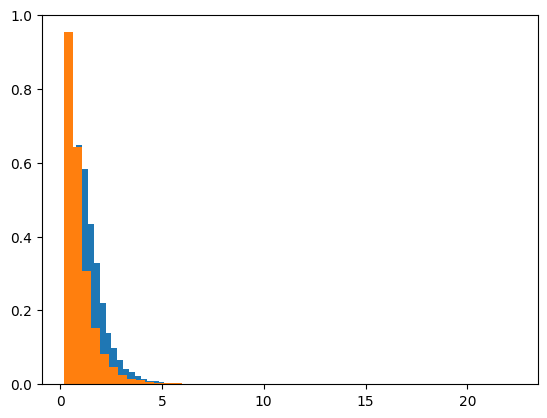

In [25]:
plt.hist(np.linalg.norm(trigger_momentums, axis=-1), bins=50, density=True)
plt.hist(np.linalg.norm(nontrigger_momentums, axis=-1), bins=50, density=True)

In [27]:
help(np.histogram)

Help on function histogram in module numpy:

histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
    Compute the histogram of a dataset.
    
    Parameters
    ----------
    a : array_like
        Input data. The histogram is computed over the flattened array.
    bins : int or sequence of scalars or str, optional
        If `bins` is an int, it defines the number of equal-width
        bins in the given range (10, by default). If `bins` is a
        sequence, it defines a monotonically increasing array of bin edges,
        including the rightmost edge, allowing for non-uniform bin widths.
    
        .. versionadded:: 1.11.0
    
        If `bins` is a string, it defines the method used to calculate the
        optimal bin width, as defined by `histogram_bin_edges`.
    
    range : (float, float), optional
        The lower and upper range of the bins.  If not provided, range
        is simply ``(a.min(), a.max())``.  Values outside the range are
        ig